## Exploratory Data analysis

---

### Context
The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.  Instead, company executives have decided to focus on their churn: the rate at which they lose customers.


---

A data of 7,000 customers is available. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month.  The data also offers demographic data and data on the services that each customer purchases.  Finally there is information on the payments those customers make.

---

In [3]:
##importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_init = pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
data_init.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data analysis

In [8]:
data_copy = data_init.copy()

### Variable target : Churn

---

In [9]:
data_copy.shape

(7043, 21)

In [14]:
data_copy.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
data_copy.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

### Quantitative : 3 , Qualitative: 18

In [17]:
## Missing values
data_copy.isnull().sum().values.sum()

0

In [18]:
data_copy.drop('customerID', axis = 1, inplace = True)

In [23]:
print(data_copy['Churn'].value_counts())
print(data_copy['Churn'].value_counts(normalize = True))

No     5174
Yes    1869
Name: Churn, dtype: int64
No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


### 26.537% of churn

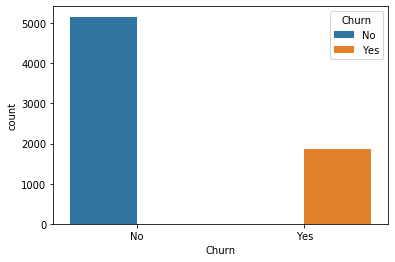

In [72]:
sns.countplot(x = 'Churn' , hue = 'Churn', data = data_copy)

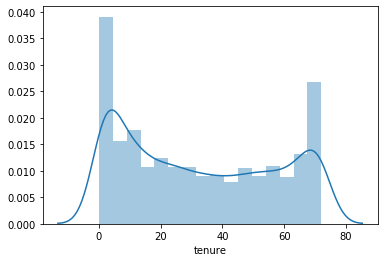

In [27]:
plt.figure()
sns.distplot(data_copy['tenure'])

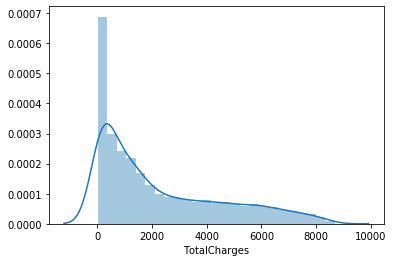

In [33]:
#Replacing spaces with null values in total charges column
data_copy['TotalCharges'] = data_copy["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain 
data_copy = data_copy[data_copy["TotalCharges"].notnull()]
data_copy = data_copy.reset_index()[data_copy.columns]
data_copy["TotalCharges"] = data_copy["TotalCharges"].astype(float)
plt.figure()
sns.distplot(data_copy['TotalCharges'])

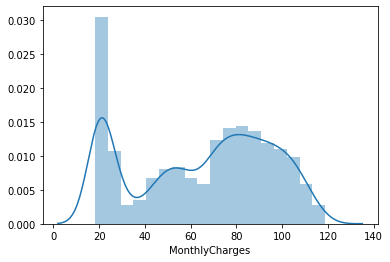

In [28]:
plt.figure()
sns.distplot(data_copy['MonthlyCharges'])

In [34]:
for col in data_copy.select_dtypes('object'):
    print(f'{col :-<30} {data_copy[col].unique()}')

gender------------------------ ['Female' 'Male']
Partner----------------------- ['Yes' 'No']
Dependents-------------------- ['No' 'Yes']
PhoneService------------------ ['No' 'Yes']
MultipleLines----------------- ['No phone service' 'No' 'Yes']
InternetService--------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity---------------- ['No' 'Yes' 'No internet service']
OnlineBackup------------------ ['Yes' 'No' 'No internet service']
DeviceProtection-------------- ['No' 'Yes' 'No internet service']
TechSupport------------------- ['No' 'Yes' 'No internet service']
StreamingTV------------------- ['No' 'Yes' 'No internet service']
StreamingMovies--------------- ['No' 'Yes' 'No internet service']
Contract---------------------- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling-------------- ['Yes' 'No']
PaymentMethod----------------- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn------------------------- ['No' 'Yes']


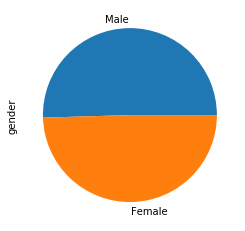

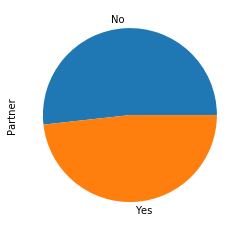

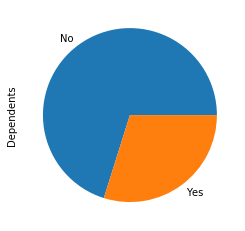

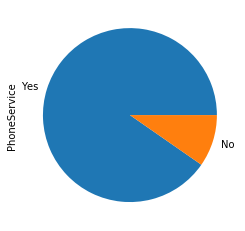

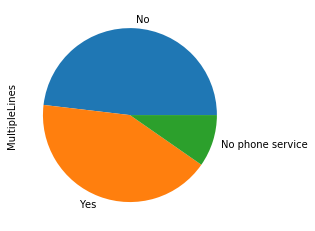

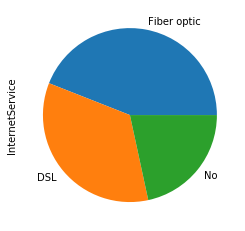

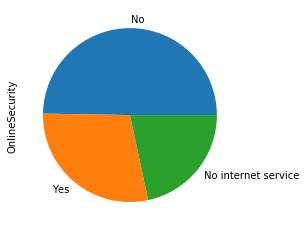

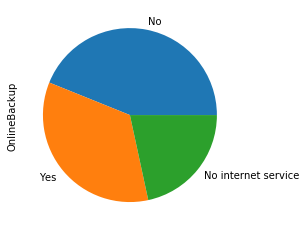

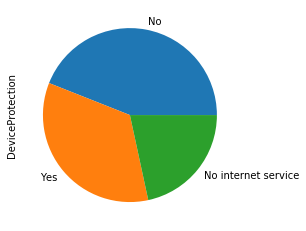

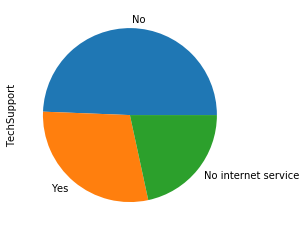

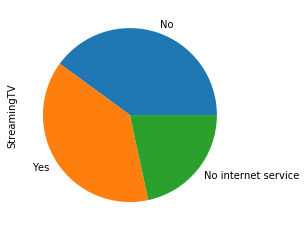

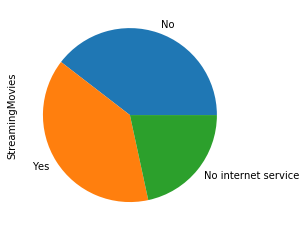

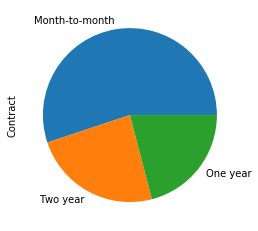

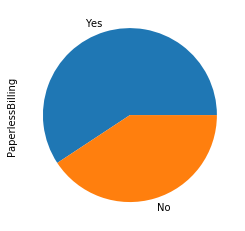

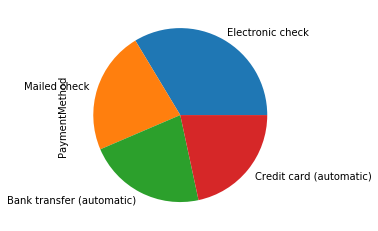

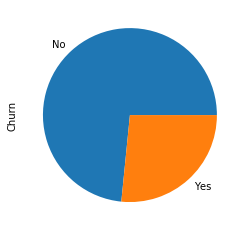

In [38]:
for col in data_copy.select_dtypes('object'):
    plt.figure()
    data_copy[col].value_counts().plot.pie()

In [46]:
data_churn_No = data_copy[data_copy['Churn'] == 'No']
display(data_churn_No.head())
data_churn_Yes = data_copy[data_copy['Churn'] == 'Yes']
display(data_churn_Yes.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [49]:
data_churn_Yes['gender'].value_counts()

Female    939
Male      930
Name: gender, dtype: int64

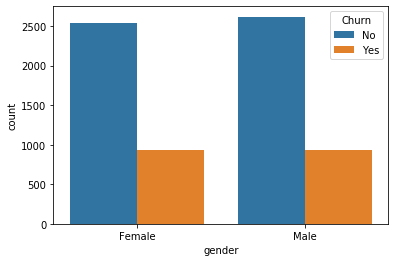

In [58]:
sns.countplot(x = 'gender', hue = 'Churn', data = data_copy)

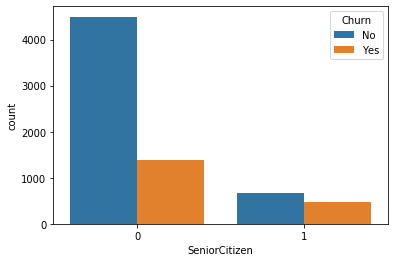

In [60]:
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = data_copy)

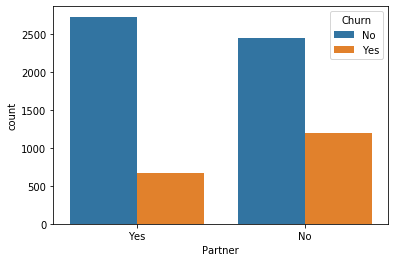

In [61]:
sns.countplot(x = 'Partner', hue = 'Churn', data = data_copy)

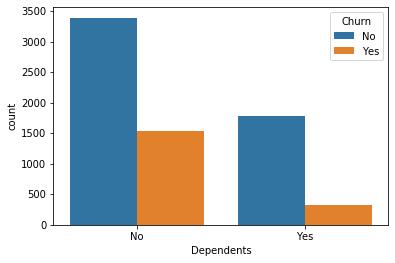

In [62]:
sns.countplot(x = 'Dependents', hue = 'Churn', data = data_copy)

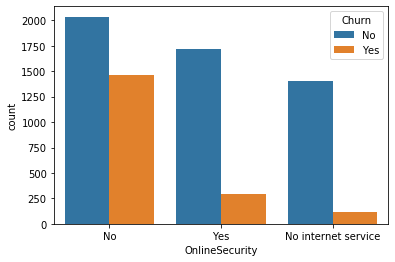

In [64]:
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = data_copy)

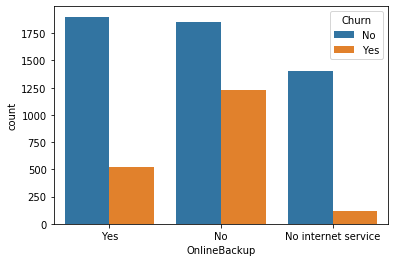

In [65]:
sns.countplot(x = 'OnlineBackup', hue = 'Churn', data = data_copy)

Churn
No     316530.15
Yes    139130.85
Name: MonthlyCharges, dtype: float64


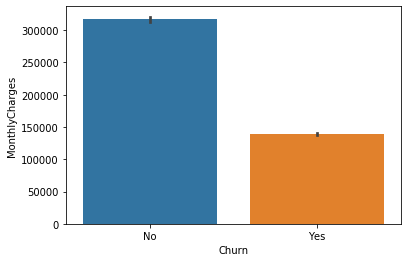

In [68]:
data_charge=data_copy.groupby(by='Churn').sum()['MonthlyCharges']
print(data_charge)
sns.barplot(x=data_copy['Churn'],y=data_copy['MonthlyCharges'],estimator=sum)

In [78]:
data_copy['TotalCharges'].fillna(data_copy['MonthlyCharges'], inplace=True)


In [81]:
#data_copy['Churn'] = data_copy.Churn.replace({'Yes': 1, 'No': 0})

In [82]:
#The mininum value in Monthly Charges
display(data_copy['MonthlyCharges'].min())
#the maximum value in Monthly Charges
display(data_copy['MonthlyCharges'].max())
#The mean Monthly Charges of Churn Customers
display(round(data_copy[data_copy['Churn'] != 0]['MonthlyCharges'].mean(),2))
#The mean Monthly Charges of Non-churn Customers 
display(round(data_copy[data_copy['Churn'] == 0]['MonthlyCharges'].mean(),2))

18.25

118.75

74.44

61.31

In [83]:
#Total Amount of Monthly Charges by each group
print(round(data_copy.groupby('Churn')['MonthlyCharges'].sum() ))

Churn
0    316530.0
1    139131.0
Name: MonthlyCharges, dtype: float64
